In [8]:
import numpy as np
from scipy.io import loadmat, savemat
from scipy.signal import find_peaks
import os
import matplotlib.pyplot as plt
from matplotlib import interactive

%matplotlib inline

interactive(True)
index = 0

cwd_path = os.getcwd()
loaded_data = loadmat('data.mat')
loaded_data_ultrasonic = loaded_data['ultrasound']
loaded_data_signal = loaded_data['sig']

In [9]:
loaded_data

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Sun Jan 26 21:37:27 2025',
 '__version__': '1.0',
 '__globals__': [],
 'ultrasound': array([[0, 0, 0, ..., 0, 0, 0]], shape=(1, 397312)),
 'sig': array([[0, 0, 0, ..., 0, 0, 0]], shape=(1, 397312))}

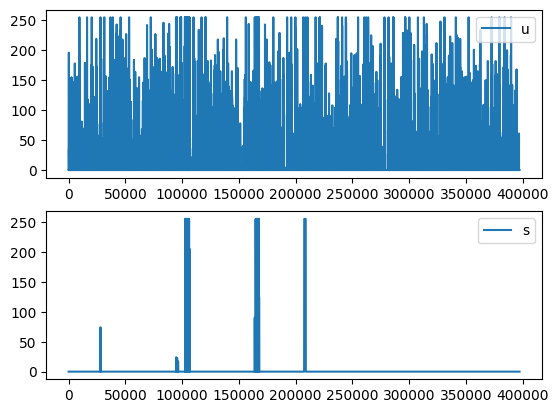

In [14]:
fig, axes  = plt.subplots(nrows= 2, ncols=1)
axes[0].plot(loaded_data_ultrasonic[index])
axes[0].legend('ultrasonic')
axes[1].plot(loaded_data_signal[index])
axes[1].legend('signal')

In [4]:

is_255 = loaded_data_signal[index] == 255
runs = np.diff(np.where(np.concatenate(([0], is_255, [0])))[0])
starts = np.where(np.diff(np.concatenate(([0], is_255, [0])) == 1))[0]

In [6]:
threshold = 0.8
peaks, _ = find_peaks(loaded_data_signal[index], height=threshold)
np.diff(peaks) < 20

array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

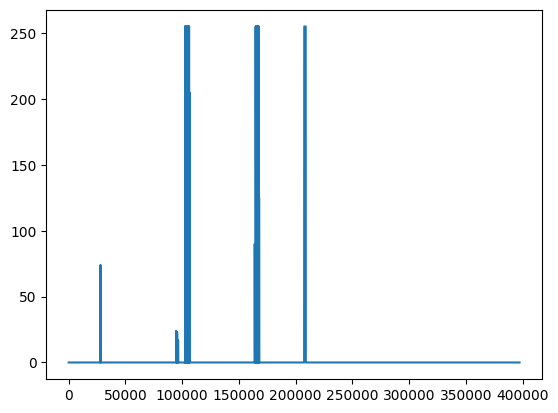

In [7]:
plt.plot(loaded_data_signal[index])